# Multi-dimensional Monte Carlo integration

In this notebook you will implement a Monte Carlo integration function to estimate the size of the unit ball in different dimensions.

In [1]:
import numpy
import random
import matplotlib.pyplot as plt

Implement the function `integrate` that gives the Monte Carlo estimate for the volume of a unit ball in `dim` dimensions. To do so we choose random numbers in the `dim`-dimensional cube of sides $[-1,+1]$ that contains the unit ball. Use the random numbers provided, they form a `npoints` dimensional array of `dim` coordinates in the cube.

In [2]:
def integrate(npoints, dim):
    # the random numbers
    rs = numpy.random.uniform(-1, 1, size=(npoints,dim))
    n_inside = 0
    for r in rs:
        L = r*r
        if numpy.sum(L)<1:
            n_inside += 1
    Volume = (n_inside / npoints)*(2**dim)
    return Volume

Check your answer:

In [3]:
numpy.random.seed(1234)
assert numpy.isclose(integrate(1000000, 2), 3.140204)

In [4]:
numpy.random.seed(1234)
assert numpy.isclose(integrate(100000, 3), 4.20312)

In [5]:
numpy.random.seed(1234)
assert numpy.isclose(integrate(100000, 4), 4.97312)

In [6]:
numpy.random.seed(1234)
assert numpy.isclose(integrate(100000, 5), 5.31616)

In [7]:
numpy.random.seed(1234)
assert numpy.isclose(integrate(100000, 6), 5.20448)

Use your function to show that the integration error scaling is independent of the dimension and that the error scales as $1/\sqrt{N}$. Use the provided number of points and dimensions. Your plot should have labels, a title and a legend.

| dimension | volume of the unit ball |
| --------- | ----------------------- |
| 2         |  $\pi$                  |
|    3      | $4/3\pi$                |
|    4      | $1/2\pi^2$              |
|    5      | $8/15\pi^2$             |
|    6      | $1/6\pi^3$              |




Text(0.5,1,'Montecarlo error against number N of points used for the calculation of the volume of an n dimensional sphere')

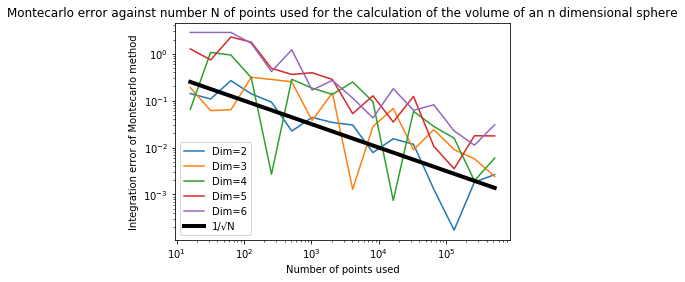

In [20]:
ns = [2**ii for ii in range(4,20)]
dimensions = range(2,7)
Error2 = [abs(integrate(Np,2)-numpy.pi) for Np in ns]
Error3= [abs(integrate(Np,3)-(4/3)*numpy.pi) for Np in ns]
Error4 = [abs(integrate(Np,4)-(1/2)*(numpy.pi)**2) for Np in ns]
Error5 = [abs(integrate(Np,5)-(8/15)*(numpy.pi)**2) for Np in ns]
Error6 = [abs(integrate(Np,6)-(1/6)*(numpy.pi)**3) for Np in ns]
Line = [1/((n)**(1/2)) for n in ns]
plt.loglog(ns, Error2,label="Dim=2")
plt.loglog(ns, Error3,label="Dim=3")
plt.loglog(ns, Error4,label="Dim=4")
plt.loglog(ns, Error5,label="Dim=5")
plt.loglog(ns, Error6,label="Dim=6")
plt.loglog(ns, Line, linewidth=4, color='k',label='1/√N')
plt.legend(loc='best')
plt.ylabel('Integration error of Montecarlo method')
plt.xlabel('Number of points used')
plt.title("Montecarlo error against number N of points used for the calculation of the volume of an n dimensional sphere")